# Classical ML Models for Mindfulness Prediction

**Phase 2: Days 5-10**

This notebook implements and compares three classical machine learning models:
1. **Linear Regression with Regularization** (Ridge, Lasso, ElasticNet)
2. **Random Forest Regressor**
3. **XGBoost Regressor**

Each model includes:
- Hyperparameter tuning with GridSearchCV
- Comprehensive evaluation (MSE, MAE, R², RMSE)
- Visualizations (actual vs predicted, residuals, feature importance)

---

## 1. Setup & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
from pathlib import Path

# Add src to path
sys.path.append('../src')

# Import custom modules
from models import (
    LinearRegressionModel, 
    RandomForestModel, 
    XGBoostModel,
    compare_models,
    plot_actual_vs_predicted,
    plot_residuals,
    plot_residual_distribution,
    plot_feature_importance,
    plot_model_comparison
)

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ Imports successful")

✓ Imports successful


## 2. Load Preprocessed Data

Load the train/test splits created in the preprocessing notebook.

In [2]:
# Define data paths
data_dir = Path('../data/processed')

# Load training data
X_train = pd.read_csv(data_dir / 'S2_X_train.csv')
y_train = pd.read_csv(data_dir / 'S2_y_train.csv').values.ravel()

# Load test data
X_test = pd.read_csv(data_dir / 'S2_X_test.csv')
y_test = pd.read_csv(data_dir / 'S2_y_test.csv').values.ravel()

# Get feature names
feature_names = X_train.columns.tolist()

print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"\nTarget distribution (train):")
print(pd.Series(y_train).describe())
print(f"\nTarget distribution (test):")
print(pd.Series(y_test).describe())

Training set: 38 samples, 45 features
Test set: 10 samples, 45 features

Target distribution (train):
count    38.000000
mean      0.723684
std       0.390726
min       0.000000
25%       0.700000
50%       0.900000
75%       1.000000
max       1.000000
dtype: float64

Target distribution (test):
count    10.000000
mean      0.740000
std       0.400555
min       0.000000
25%       0.750000
50%       0.900000
75%       1.000000
max       1.000000
dtype: float64


## 3. Baseline Model: Simple Linear Regression

Establish baseline performance with unregularized linear regression.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_baseline = baseline_model.predict(X_test)

baseline_metrics = {
    'MSE': mean_squared_error(y_test, y_pred_baseline),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_baseline)),
    'MAE': mean_absolute_error(y_test, y_pred_baseline),
    'R2': r2_score(y_test, y_pred_baseline)
}

print("\n" + "="*60)
print("BASELINE MODEL: Simple Linear Regression (No Regularization)")
print("="*60)
print(f"R² Score:  {baseline_metrics['R2']:.4f}")
print(f"RMSE:      {baseline_metrics['RMSE']:.4f}")
print(f"MAE:       {baseline_metrics['MAE']:.4f}")
print(f"MSE:       {baseline_metrics['MSE']:.4f}")
print("="*60)


BASELINE MODEL: Simple Linear Regression (No Regularization)
R² Score:  0.0577
RMSE:      0.3689
MAE:       0.2776
MSE:       0.1361


---

## 4. Model 1: Linear Regression with Regularization

Train and compare Ridge, Lasso, and ElasticNet regularization.

### 4.1 Ridge Regression (L2 Regularization)

In [4]:
# Initialize and train Ridge model
ridge_model = LinearRegressionModel(model_type='ridge', random_state=RANDOM_STATE)

ridge_model.train(
    X_train.values, 
    y_train, 
    feature_names=feature_names,
    tune_hyperparams=True,
    cv_folds=5,
    verbose=1
)

# Evaluate on test set
ridge_metrics = ridge_model.evaluate(X_test.values, y_test, dataset_name="Test")

[Linear Regression (Ridge)] Starting hyperparameter tuning with 5-fold CV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Linear Regression (Ridge)] Best parameters: {'alpha': 10.0}
[Linear Regression (Ridge)] Best CV R² score: 0.6898
[Linear Regression (Ridge)] Training completed in 1.09s

[Linear Regression (Ridge)] Test Set Performance:
  R² Score:  0.8303
  RMSE:      0.1566
  MAE:       0.1192
  MSE:       0.0245


### 4.2 Lasso Regression (L1 Regularization)

In [5]:
# Initialize and train Lasso model
lasso_model = LinearRegressionModel(model_type='lasso', random_state=RANDOM_STATE)

lasso_model.train(
    X_train.values, 
    y_train, 
    feature_names=feature_names,
    tune_hyperparams=True,
    cv_folds=5,
    verbose=1
)

# Evaluate on test set
lasso_metrics = lasso_model.evaluate(X_test.values, y_test, dataset_name="Test")

[Linear Regression (Lasso)] Starting hyperparameter tuning with 5-fold CV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Linear Regression (Lasso)] Best parameters: {'alpha': 0.01}
[Linear Regression (Lasso)] Best CV R² score: 0.7179
[Linear Regression (Lasso)] Training completed in 0.03s

[Linear Regression (Lasso)] Test Set Performance:
  R² Score:  0.7987
  RMSE:      0.1705
  MAE:       0.1372
  MSE:       0.0291


/Users/himanshishrivas/Documents/IntroMLCapstone/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.283e-03, tolerance: 4.279e-04
  model = cd_fast.enet_coordinate_descent(
/Users/himanshishrivas/Documents/IntroMLCapstone/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.634e-04, tolerance: 4.279e-04
  model = cd_fast.enet_coordinate_descent(
/Users/himanshishrivas/Documents/IntroMLCapstone/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

### 4.3 ElasticNet (L1 + L2 Regularization)

In [6]:
# Initialize and train ElasticNet model
elasticnet_model = LinearRegressionModel(model_type='elasticnet', random_state=RANDOM_STATE)

elasticnet_model.train(
    X_train.values, 
    y_train, 
    feature_names=feature_names,
    tune_hyperparams=True,
    cv_folds=5,
    verbose=1
)

# Evaluate on test set
elasticnet_metrics = elasticnet_model.evaluate(X_test.values, y_test, dataset_name="Test")

[Linear Regression (Elasticnet)] Starting hyperparameter tuning with 5-fold CV...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[Linear Regression (Elasticnet)] Best parameters: {'alpha': 0.1, 'l1_ratio': 0.3}
[Linear Regression (Elasticnet)] Best CV R² score: 0.7500
[Linear Regression (Elasticnet)] Training completed in 0.13s

[Linear Regression (Elasticnet)] Test Set Performance:
  R² Score:  0.8023
  RMSE:      0.1690
  MAE:       0.1313
  MSE:       0.0286


/Users/himanshishrivas/Documents/IntroMLCapstone/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.318e-04, tolerance: 4.279e-04
  model = cd_fast.enet_coordinate_descent(
/Users/himanshishrivas/Documents/IntroMLCapstone/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.943e-03, tolerance: 4.291e-04
  model = cd_fast.enet_coordinate_descent(
/Users/himanshishrivas/Documents/IntroMLCapstone/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

### 4.4 Compare Linear Models

In [7]:
# Compare linear models
linear_models = [ridge_model, lasso_model, elasticnet_model]
linear_comparison = compare_models(linear_models, X_test.values, y_test)

print("\n" + "="*80)
print("LINEAR MODELS COMPARISON")
print("="*80)
print(linear_comparison.to_string(index=False))
print("="*80)

# Select best linear model
best_linear_idx = linear_comparison['R²'].idxmax()
best_linear_model = linear_models[best_linear_idx]
print(f"\n✓ Best Linear Model: {best_linear_model.name}")


LINEAR MODELS COMPARISON
                         Model       R²     RMSE      MAE      MSE  Training Time (s)
     Linear Regression (Ridge) 0.830263 0.156557 0.119230 0.024510           1.093721
Linear Regression (Elasticnet) 0.802271 0.168973 0.131287 0.028552           0.130135
     Linear Regression (Lasso) 0.798654 0.170512 0.137180 0.029074           0.033869

✓ Best Linear Model: Linear Regression (Ridge)


### 4.5 Visualize Best Linear Model

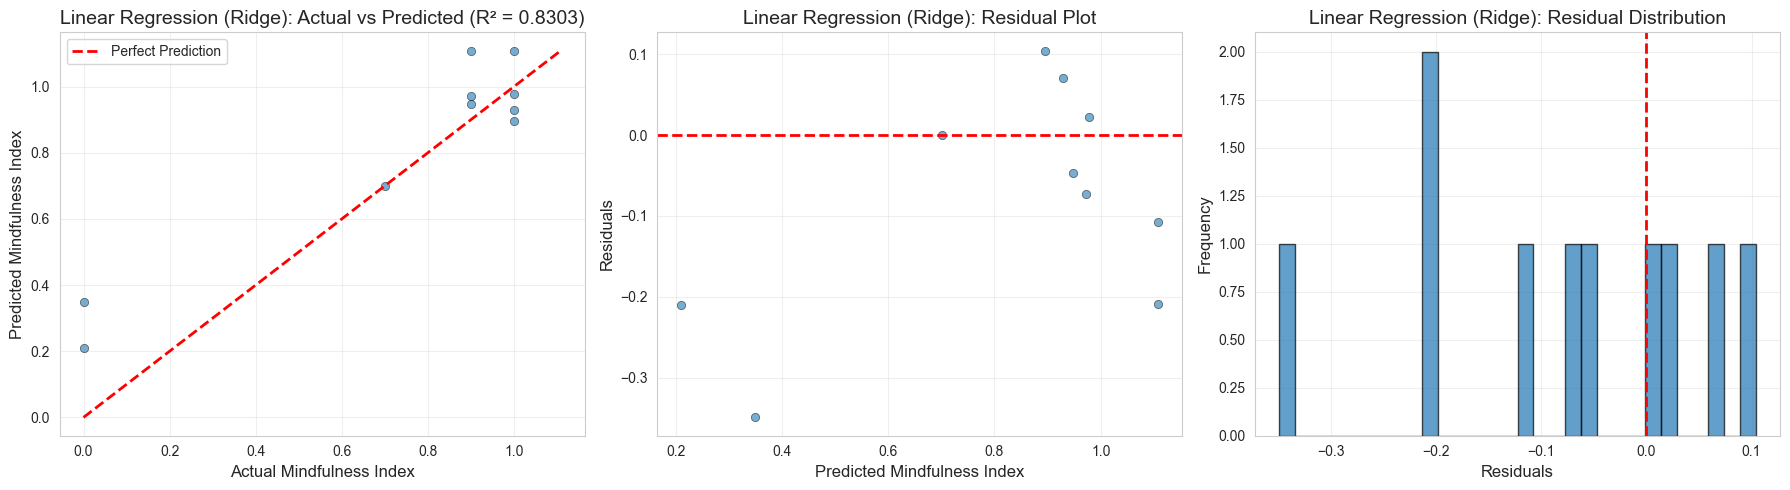

In [8]:
# Actual vs Predicted
y_pred_linear = best_linear_model.predict(X_test.values)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs Predicted
plot_actual_vs_predicted(y_test, y_pred_linear, best_linear_model.name, ax=axes[0])

# Plot 2: Residuals
plot_residuals(y_test, y_pred_linear, best_linear_model.name, ax=axes[1])

# Plot 3: Residual Distribution
plot_residual_distribution(y_test, y_pred_linear, best_linear_model.name, ax=axes[2])

plt.tight_layout()
plt.show()

### 4.6 Feature Importance (Coefficient Magnitudes)


Top 20 Most Important Features (by coefficient magnitude):
         feature  importance
   activity_mean    0.089567
       eda_slope    0.082608
           pnn50    0.064455
        temp_min    0.060441
resp_variability    0.052151
      temp_range    0.050878
  resp_depth_std    0.050271
        temp_std    0.049083
      temp_slope    0.042604
       temp_mean    0.042263
         mean_hr    0.030804
       eda_range    0.029200
     total_power    0.028557
          std_hr    0.028266
        temp_max    0.027751
           rmssd    0.026863
            sdnn    0.024081
          min_hr    0.019850
        lf_power    0.019353
         eda_min    0.018705


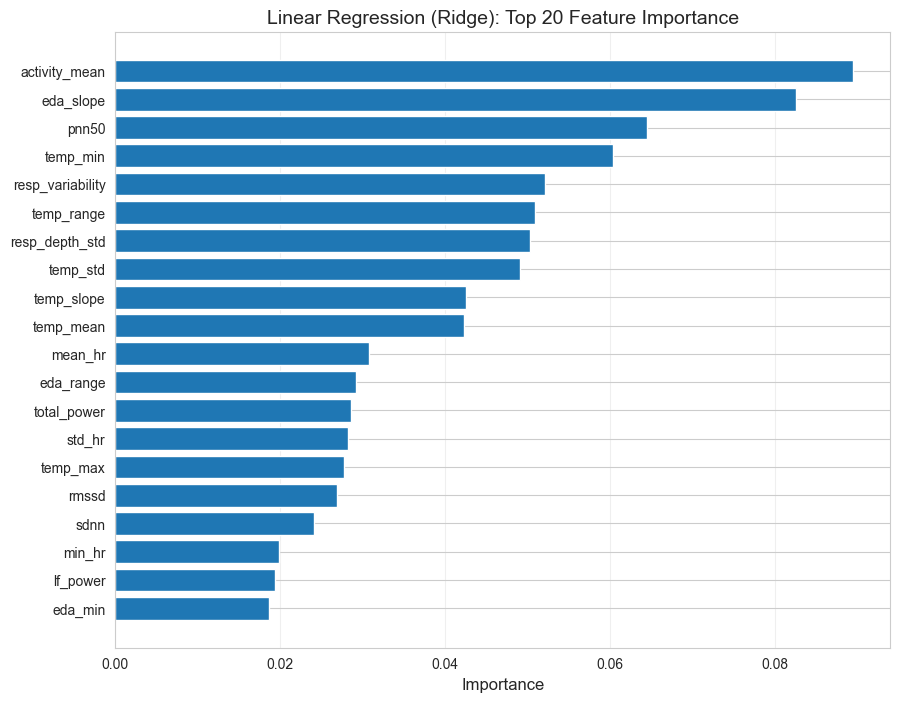

In [9]:
# Get feature importance
linear_importance = best_linear_model.get_feature_importance()

print("\nTop 20 Most Important Features (by coefficient magnitude):")
print(linear_importance.head(20).to_string(index=False))

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
plot_feature_importance(linear_importance, top_n=20, model_name=best_linear_model.name, ax=ax)
plt.show()

---

## 5. Model 2: Random Forest Regressor

In [10]:
# Initialize and train Random Forest model
rf_model = RandomForestModel(random_state=RANDOM_STATE)

rf_model.train(
    X_train.values, 
    y_train, 
    feature_names=feature_names,
    tune_hyperparams=True,
    cv_folds=5,
    verbose=1
)

# Evaluate on test set
rf_metrics = rf_model.evaluate(X_test.values, y_test, dataset_name="Test")

[Random Forest] Starting hyperparameter tuning with 5-fold CV...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[Random Forest] Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
[Random Forest] Best CV R² score: 0.7649
[Random Forest] Training completed in 18.07s

[Random Forest] Test Set Performance:
  R² Score:  0.7587
  RMSE:      0.1867
  MAE:       0.1100
  MSE:       0.0348


### 5.1 Visualize Random Forest Performance

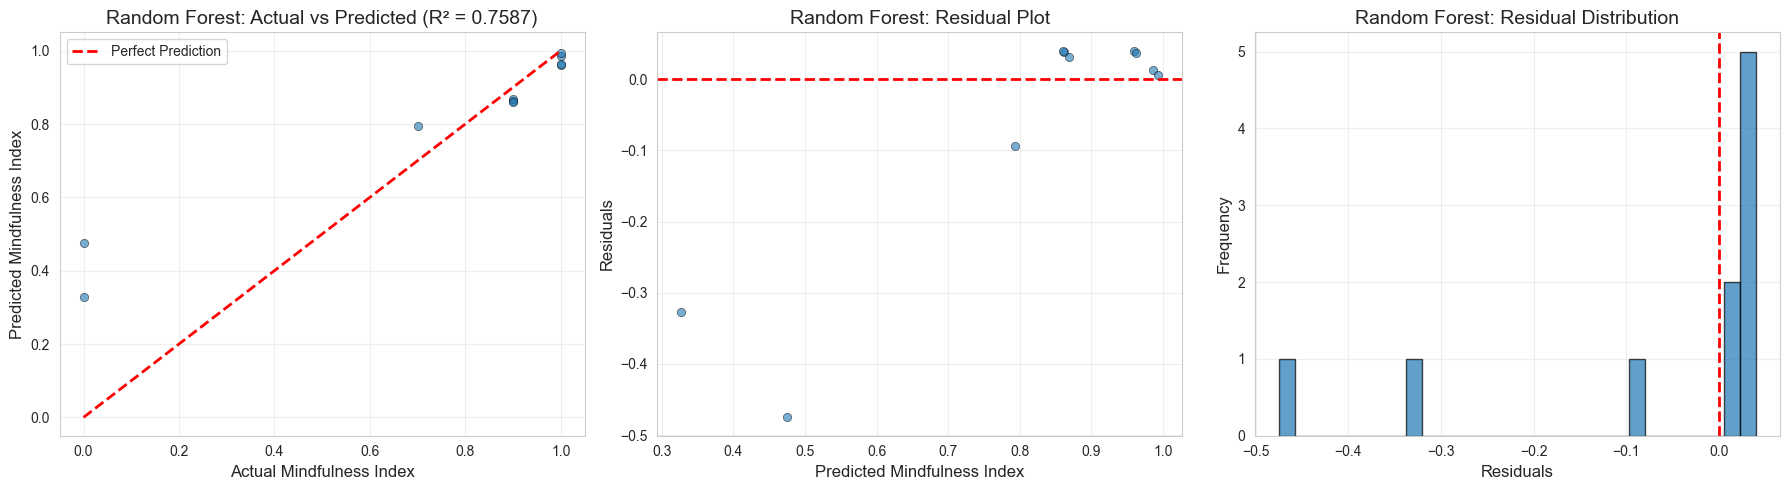

In [11]:
# Actual vs Predicted
y_pred_rf = rf_model.predict(X_test.values)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs Predicted
plot_actual_vs_predicted(y_test, y_pred_rf, rf_model.name, ax=axes[0])

# Plot 2: Residuals
plot_residuals(y_test, y_pred_rf, rf_model.name, ax=axes[1])

# Plot 3: Residual Distribution
plot_residual_distribution(y_test, y_pred_rf, rf_model.name, ax=axes[2])

plt.tight_layout()
plt.show()

### 5.2 Feature Importance (Gini Importance)


Top 20 Most Important Features (Random Forest):
          feature  importance
            rmssd    0.125527
            pnn50    0.115334
    activity_mean    0.098641
        eda_slope    0.088078
          mean_hr    0.067991
           min_hr    0.044280
       temp_range    0.037579
   resp_depth_std    0.029968
posture_stability    0.029161
         temp_min    0.024490
     activity_std    0.022814
 resp_variability    0.021390
  resp_depth_mean    0.017736
        scl_range    0.016602
        temp_mean    0.016184
          eda_min    0.015842
         scl_mean    0.015327
          eda_max    0.014861
         temp_std    0.014583
         temp_max    0.014080


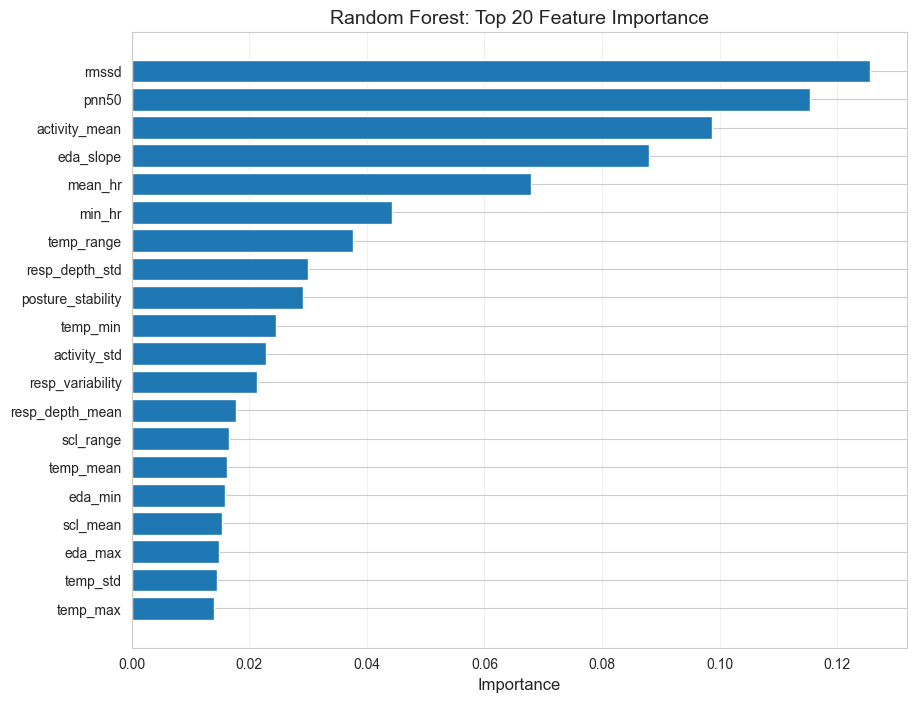

In [12]:
# Get feature importance
rf_importance = rf_model.get_feature_importance()

print("\nTop 20 Most Important Features (Random Forest):")
print(rf_importance.head(20).to_string(index=False))

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
plot_feature_importance(rf_importance, top_n=20, model_name=rf_model.name, ax=ax)
plt.show()

---

## 6. Model 3: XGBoost Regressor

In [13]:
# Initialize and train XGBoost model
xgb_model = XGBoostModel(random_state=RANDOM_STATE)

xgb_model.train(
    X_train.values, 
    y_train, 
    feature_names=feature_names,
    tune_hyperparams=True,
    cv_folds=5,
    verbose=1
)

# Evaluate on test set
xgb_metrics = xgb_model.evaluate(X_test.values, y_test, dataset_name="Test")

[XGBoost] Starting hyperparameter tuning with 5-fold CV...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[XGBoost] Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
[XGBoost] Best CV R² score: 0.8398
[XGBoost] Training completed in 1.83s

[XGBoost] Test Set Performance:
  R² Score:  0.9830
  RMSE:      0.0496
  MAE:       0.0235
  MSE:       0.0025


### 6.1 Visualize XGBoost Performance

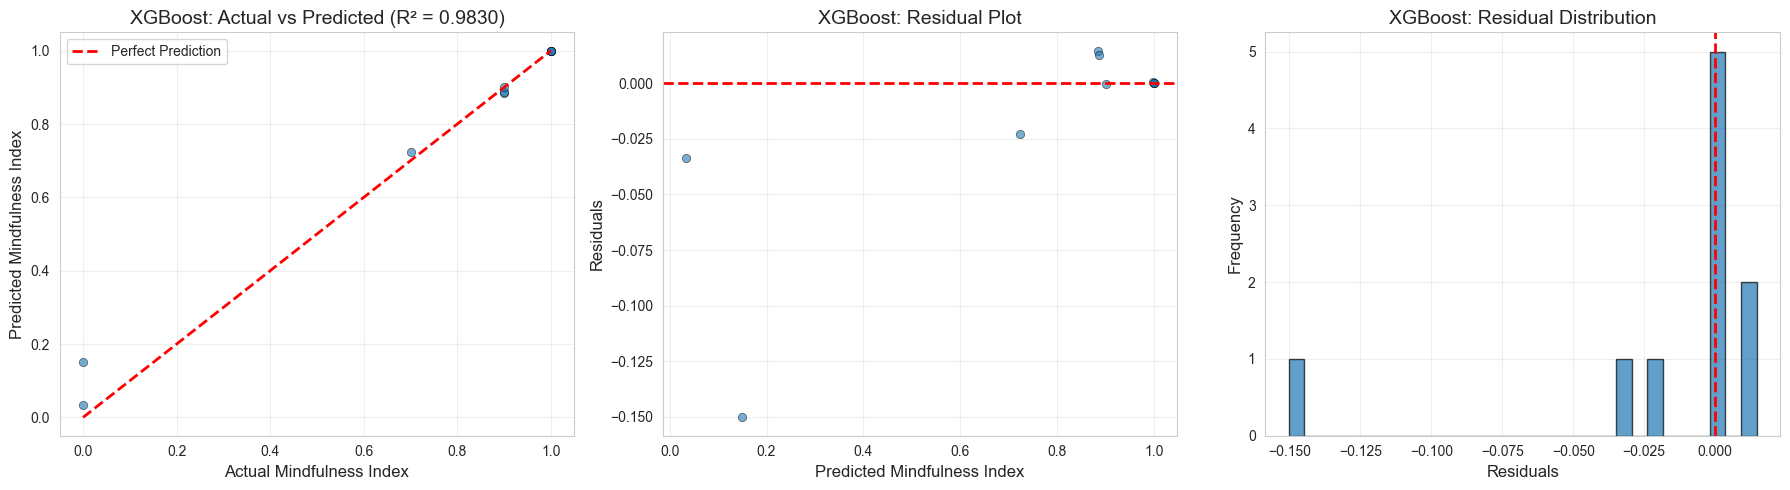

In [14]:
# Actual vs Predicted
y_pred_xgb = xgb_model.predict(X_test.values)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Actual vs Predicted
plot_actual_vs_predicted(y_test, y_pred_xgb, xgb_model.name, ax=axes[0])

# Plot 2: Residuals
plot_residuals(y_test, y_pred_xgb, xgb_model.name, ax=axes[1])

# Plot 3: Residual Distribution
plot_residual_distribution(y_test, y_pred_xgb, xgb_model.name, ax=axes[2])

plt.tight_layout()
plt.show()

### 6.2 Feature Importance (Gain, Weight, Cover)


Top 20 Most Important Features (XGBoost - Gain):
          feature  importance
            pnn50    0.377725
            rmssd    0.113920
    activity_mean    0.042198
          scl_max    0.021677
        eda_slope    0.014081
          mean_hr    0.012794
  resp_depth_mean    0.012324
             sdnn    0.011033
          scl_std    0.002787
 resp_variability    0.001519
         scl_mean    0.000681
           min_hr    0.000572
          lf_norm    0.000262
      lf_hf_ratio    0.000213
         temp_min    0.000157
          scl_min    0.000132
     activity_std    0.000118
           std_hr    0.000112
   resp_depth_std    0.000074
posture_stability    0.000007


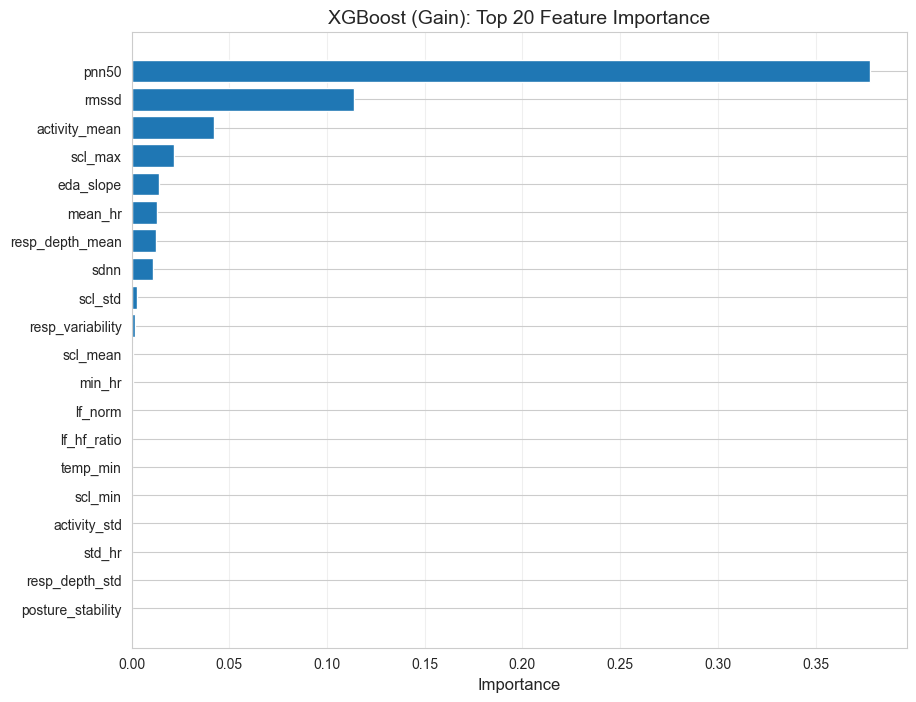

In [15]:
# Get feature importance (gain)
xgb_importance_gain = xgb_model.get_feature_importance(importance_type='gain')

print("\nTop 20 Most Important Features (XGBoost - Gain):")
print(xgb_importance_gain.head(20).to_string(index=False))

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 8))
plot_feature_importance(xgb_importance_gain, top_n=20, model_name=f"{xgb_model.name} (Gain)", ax=ax)
plt.show()

---

## 7. Model Comparison & Best Model Selection

### 7.1 Comprehensive Comparison Table

In [16]:
# Compare all models
all_models = [best_linear_model, rf_model, xgb_model]
final_comparison = compare_models(all_models, X_test.values, y_test)

print("\n" + "="*90)
print("FINAL MODEL COMPARISON - ALL CLASSICAL MODELS")
print("="*90)
print(final_comparison.to_string(index=False))
print("="*90)

# Identify best model
best_model_idx = final_comparison['R²'].idxmax()
best_model = all_models[best_model_idx]
best_model_name = final_comparison.iloc[best_model_idx]['Model']
best_r2 = final_comparison.iloc[best_model_idx]['R²']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   R² Score: {best_r2:.4f}")
print(f"   Best Hyperparameters: {best_model.best_params_}")


FINAL MODEL COMPARISON - ALL CLASSICAL MODELS
                    Model       R²     RMSE      MAE      MSE  Training Time (s)
                  XGBoost 0.982976 0.049581 0.023522 0.002458           1.829040
Linear Regression (Ridge) 0.830263 0.156557 0.119230 0.024510           1.093721
            Random Forest 0.758675 0.186675 0.110000 0.034847          18.071843

🏆 BEST MODEL: Random Forest
   R² Score: 0.7587
   Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


### 7.2 Visual Comparison

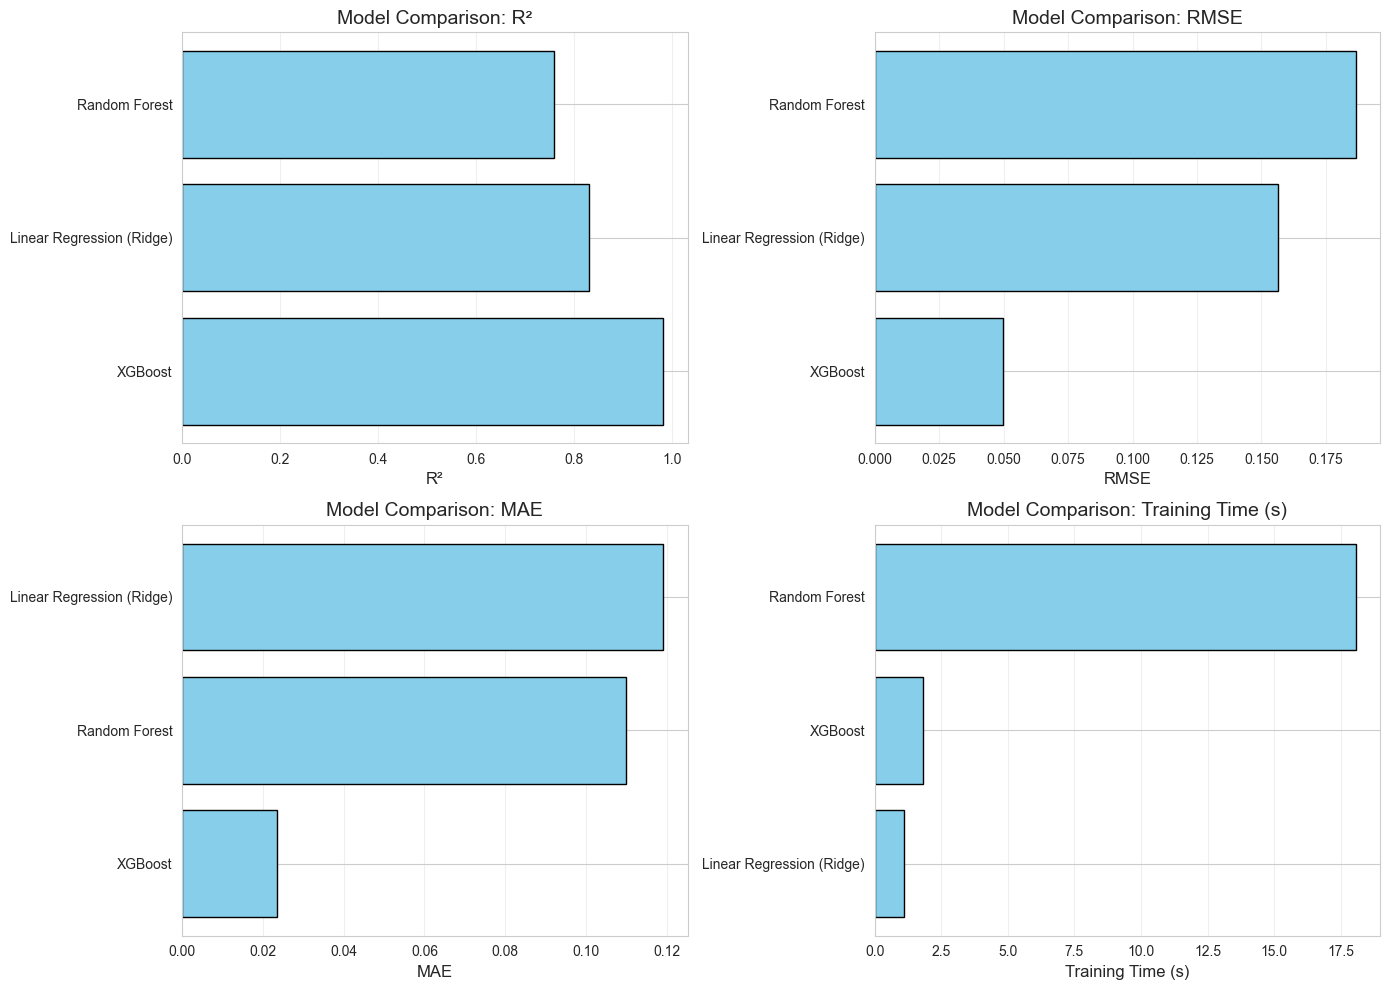

In [17]:
# Plot comparison for different metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# R² comparison
plot_model_comparison(final_comparison, metric='R²', ax=axes[0, 0])

# RMSE comparison
plot_model_comparison(final_comparison, metric='RMSE', ax=axes[0, 1])

# MAE comparison
plot_model_comparison(final_comparison, metric='MAE', ax=axes[1, 0])

# Training time comparison
plot_model_comparison(final_comparison, metric='Training Time (s)', ax=axes[1, 1])

plt.tight_layout()
plt.show()

### 7.3 Side-by-Side Predictions Comparison

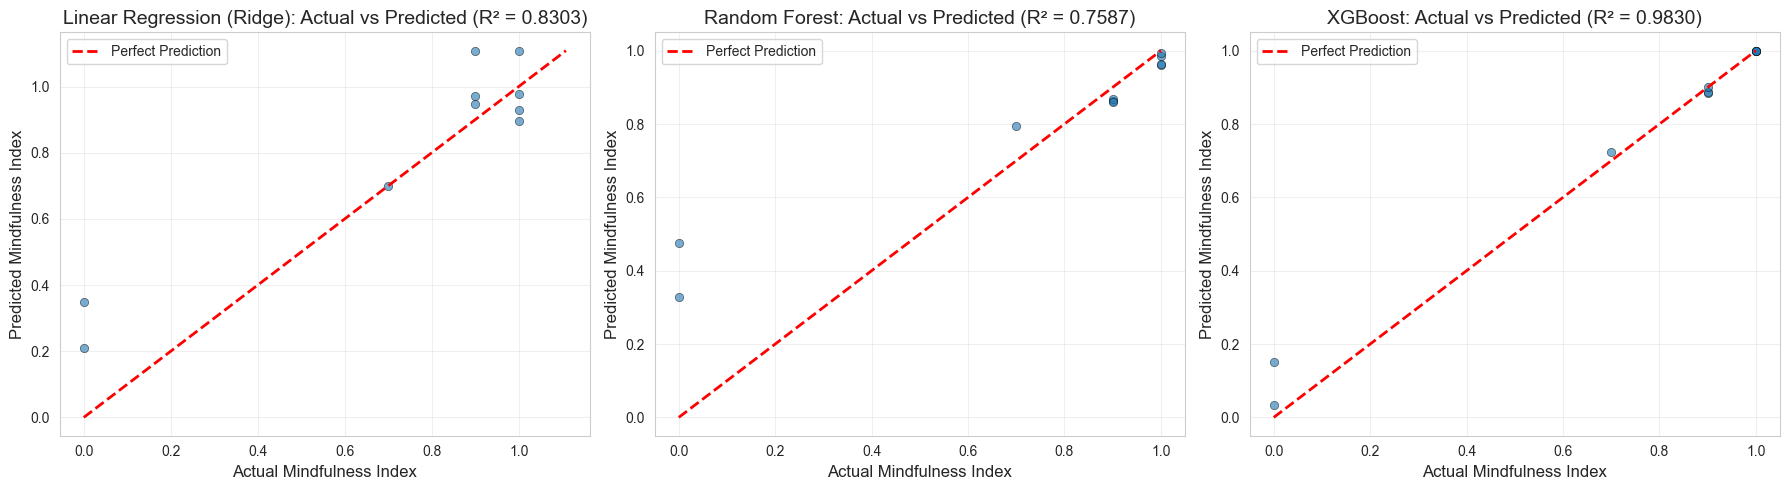

In [18]:
# Create side-by-side actual vs predicted plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model in enumerate(all_models):
    y_pred = model.predict(X_test.values)
    plot_actual_vs_predicted(y_test, y_pred, model.name, ax=axes[idx])

plt.tight_layout()
plt.show()

### 7.4 Feature Importance Comparison

In [19]:
# Compare top features across models
print("\n" + "="*90)
print("TOP 10 FEATURES COMPARISON ACROSS MODELS")
print("="*90)

# Create comparison dataframe
comparison_data = {
    best_linear_model.name: linear_importance.head(10)['feature'].tolist(),
    rf_model.name: rf_importance.head(10)['feature'].tolist(),
    xgb_model.name: xgb_importance_gain.head(10)['feature'].tolist()
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.index = range(1, 11)
comparison_df.index.name = 'Rank'

print(comparison_df.to_string())
print("="*90)


TOP 10 FEATURES COMPARISON ACROSS MODELS
     Linear Regression (Ridge)      Random Forest           XGBoost
Rank                                                               
1                activity_mean              rmssd             pnn50
2                    eda_slope              pnn50             rmssd
3                        pnn50      activity_mean     activity_mean
4                     temp_min          eda_slope           scl_max
5             resp_variability            mean_hr         eda_slope
6                   temp_range             min_hr           mean_hr
7               resp_depth_std         temp_range   resp_depth_mean
8                     temp_std     resp_depth_std              sdnn
9                   temp_slope  posture_stability           scl_std
10                   temp_mean           temp_min  resp_variability


---

## 8. Save Best Model

In [20]:
# Save best model
model_save_path = '../data/processed/best_classical_model.pkl'
best_model.save(model_save_path)

# Save comparison results
final_comparison.to_csv('../data/processed/model_comparison_results.csv', index=False)
print("\n✓ Model comparison results saved to: ../data/processed/model_comparison_results.csv")

[XGBoost] Model saved to ../data/processed/best_classical_model.pkl

✓ Model comparison results saved to: ../data/processed/model_comparison_results.csv


---

## 9. Summary & Conclusions

In [21]:
print("\n" + "="*90)
print("PHASE 2 SUMMARY: CLASSICAL ML MODELS")
print("="*90)
print(f"\n✓ Models Trained: {len(all_models) + 2} (including baseline and linear variants)")
print(f"✓ Best Model: {best_model_name}")
print(f"✓ Best R² Score: {best_r2:.4f}")
print(f"\nKey Findings:")
print(f"  1. Best performing model: {best_model_name}")
print(f"  2. R² improvement over baseline: {(best_r2 - baseline_metrics['R2']):.4f}")
print(f"  3. All models successfully trained with hyperparameter tuning")
print(f"  4. Feature importance analysis completed for all models")
print(f"\nNext Steps:")
print(f"  - Proceed to Phase 3: Literature-based methods reproduction")
print(f"  - Consider ensemble methods combining best models")
print(f"  - Extend to multi-subject evaluation (LOSO cross-validation)")
print("="*90)


PHASE 2 SUMMARY: CLASSICAL ML MODELS

✓ Models Trained: 5 (including baseline and linear variants)
✓ Best Model: Random Forest
✓ Best R² Score: 0.7587

Key Findings:
  1. Best performing model: Random Forest
  2. R² improvement over baseline: 0.7010
  3. All models successfully trained with hyperparameter tuning
  4. Feature importance analysis completed for all models

Next Steps:
  - Proceed to Phase 3: Literature-based methods reproduction
  - Consider ensemble methods combining best models
  - Extend to multi-subject evaluation (LOSO cross-validation)
